In [4]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# Simulating Brownian Motion 
Alex Gorodetsky, September 2020

In this notebook we use the properties of Brownian motion to generate simulations


## The key properties
A Brownian motion is a stochastic process in time, denoted by $W_t$, with the properties
0. *initial condition:* $W_0 = 0$ a.s
1. *normally distributed:* $W_t \sim \mathcal{N}(0, t)$ 
2. *covariance structure:* $\mathbb{E}\left[W_t  W_s\right] = \min(s, t)$
3. *independent normal increments:* $W_{t_2} - W_{t_1}$ is distributed according to a normal $\mathcal{N}(0, t_2-t_1)$ and $W_{t_4} - W_{t_3}$ is independent of $W_{t_2} - W_{t_1}$ whenever the time increments don't intersect ($0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$)
4. $W_t$ has continuous paths (as a function of $t$) with probability 1.

## The simulation

We will exploit property 3. By seeing that $W(t + \Delta t) - W(t) \sim \mathcal{N}(0, \Delta t)$ So that we can say

\begin{equation}
W(t + \Delta t) = W(t) + \sqrt{\Delta t} \xi, \quad \xi \sim \mathcal{N}(0, 1)
\end{equation}

In [6]:
def brownian_motion_simulate(T, dt):
    """Simulate a single path of brownian motion
    
    Inputs
    ------
    T: floating point variable, greater than 0, final time 
    dt: time increment of the simulation
    
    Returns
    -------
    bmotion: single path of a brownian motion simulation
    """
    nsamples = int(np.ceil(T / dt)) + 1
    samples = np.random.randn(nsamples) * np.sqrt(dt)
    samples[0] = 0.0
    bmotion = np.cumsum(samples)
    return bmotion

Lets take a look at some sample paths. First generate the samples

In [22]:
TFINAL = 1.0 # final time
DT = 0.05 # simulation time increment
NPATHS = 500 # how many paths I want to simulate
SAMPLES = np.zeros((NPATHS, int(np.ceil(TFINAL / DT))  + 1)) # allocate space for the samples
for ii in range(NPATHS):
    SAMPLES[ii, :] = brownian_motion_simulate(TFINAL, DT)

Lets plot the samples

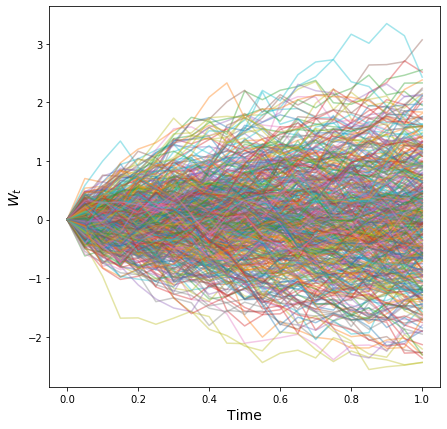

In [23]:
plt.figure(figsize=(7,7))
TSPAN = np.arange(0, TFINAL+DT, DT)
for ii in range(NPATHS):
    plt.plot(TSPAN, SAMPLES[ii, :], alpha=0.4)
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$W_t$', fontsize=14)
plt.show()

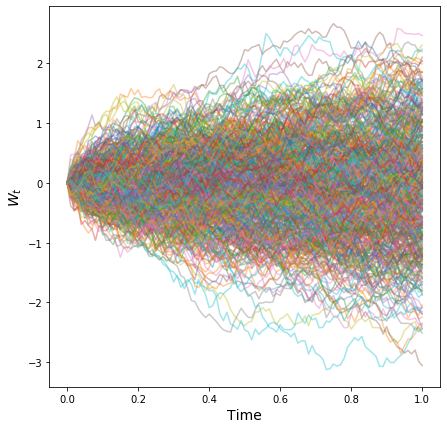

In [20]:
TFINAL = 1.0 # final time
DT = 0.01 # simulation time increment
NPATHS = 500 # how many paths I want to simulate
SAMPLES = np.zeros((NPATHS, int(np.ceil(TFINAL / DT))  + 1)) # allocate space for the samples
for ii in range(NPATHS):
    SAMPLES[ii, :] = brownian_motion_simulate(TFINAL, DT)
plt.figure(figsize=(7,7))
TSPAN = np.arange(0, TFINAL+DT, DT)
for ii in range(NPATHS):
    plt.plot(TSPAN, SAMPLES[ii, :], alpha=0.4)
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$W_t$', fontsize=14)
plt.show()

Variance at time 0.010000 = 0.010416
Variance at time 0.500000 = 0.519620


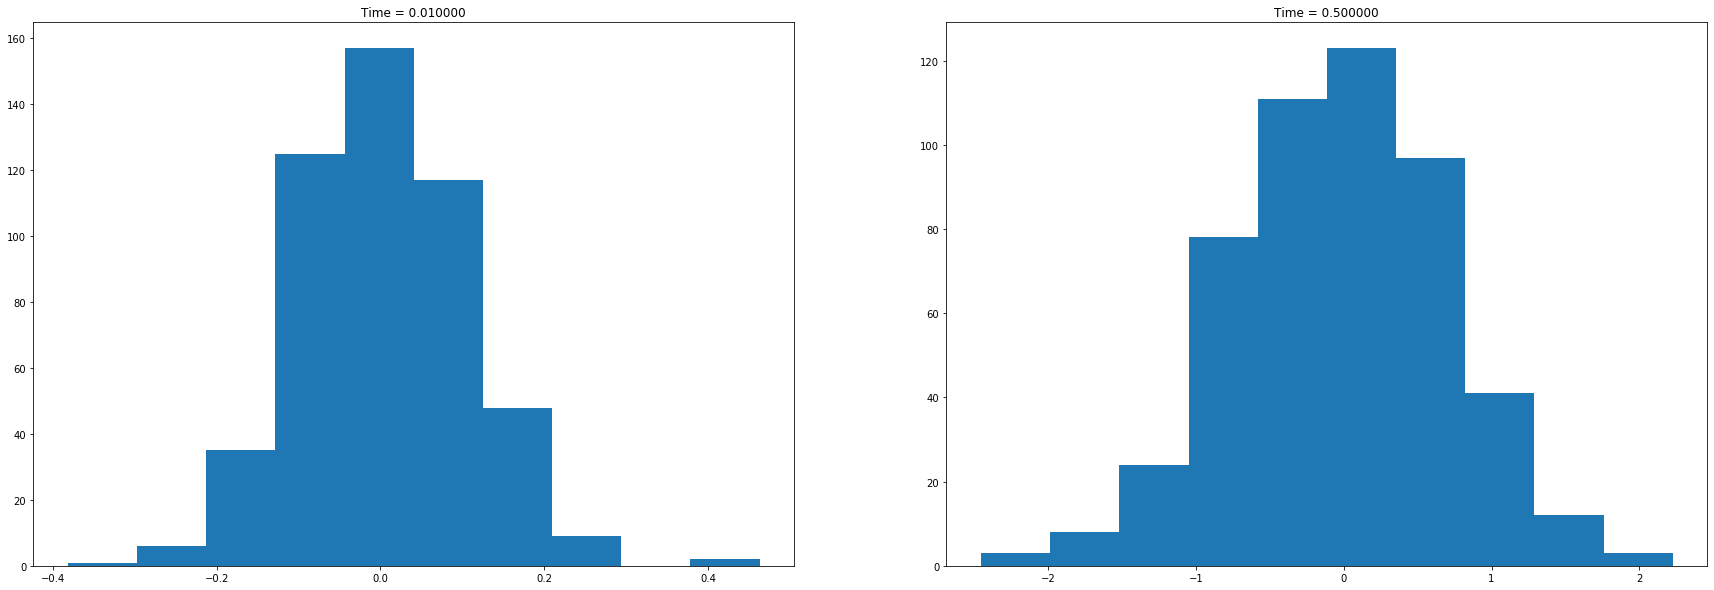

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
ax1.hist(SAMPLES[:, 1])
print("Variance at time {:5f} = {:5f}".format(TSPAN[1], np.var(SAMPLES[:, 1])))
ax1.set_title("Time = {:2f}".format(TSPAN[1]))
ax2.hist(SAMPLES[:, 50])
print("Variance at time {:5f} = {:5f}".format(TSPAN[50], np.var(SAMPLES[:, 50])))
ax2.set_title("Time = {:2f}".format(TSPAN[50]))
plt.show()